In [152]:
import pickle
import gzip
import pandas as pd
import numpy as np
from PIL import Image
import os
np.random.seed(27)

In [153]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

# Partitioning the Dataset

In [154]:
#Partition Training Data
train_X = training_data[:-1]
train_t = training_data[-1:]

tr_data = []
tr_target = []

for i in range(len(train_X[0])):
    tr_data.append(train_X[0][i])

for i in range(len(train_t[0])):
    tr_target.append(train_t[0][i])

tr_data = np.array(tr_data)

In [155]:
#Partition Validation Data
val_X = validation_data[:-1]
val_t = validation_data[-1:]

val_data = []
val_target = []

for i in range(len(val_X[0])):
    val_data.append(val_X[0][i])

for i in range(len(val_t[0])):
    val_target.append(val_t[0][i])

val_data = np.array(val_data)

In [156]:
#Partition Testing Data
test_X = test_data[:-1]
test_t = test_data[-1:]

test_data = []
test_target = []

for i in range(len(test_X[0])):
    test_data.append(test_X[0][i])

for i in range(len(test_t[0])):
    test_target.append(test_t[0][i])

test_data = np.array(test_data)

In [157]:
training = np.append(tr_data, val_data, axis=0)
target = np.append(tr_target, val_target, axis=0)

In [158]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

# Softmax Logistic Regression

In [159]:
def net_input(X, W):
    return (X.dot(W))

def softmax(z):
    prob = np.zeros(z.shape)
    for i in range(z.shape[0]):
        sum = 0
        for j in range(z.shape[1]):
            sum += np.exp(z[i][j])
        for j in range(z.shape[1]):
            prob[i][j] = np.exp(z[i][j])/sum
    return prob

def to_classlabel(z):
    return z.argmax(axis=1)

def one_hot_enc(num_classes, target):
    enc = np.zeros((len(target), 10))
    for i in range(len(target)):
        a = target[i]
        enc[i][a] = 1
    return enc

def cross_entropy(smax3, y_target):
    err = []
    y_target = one_hot_enc(10, y_target)
    for i in range(smax3.shape[0]):
        sum = 0
        for j in range(smax3.shape[1]):
             sum += np.log(smax3[i][j], dtype=np.float64) * y_target[i][j]
        err.append(-sum)
       
    return np.array(err)

def cost(smax3, y_target):
    a = cross_entropy(smax3, y_target)
    return(np.mean(a))

def gradient(X, smax3, y_enc):
    a = np.dot(X.T, (smax3 - y_enc))
    return a

def acc(ans, target):
    cc = 0
    for i in range(ans.shape[0]):
        if(ans[i] == target[i]):
            cc += 1
    return (cc/float(ans.shape[0]))

In [ ]:
W = np.zeros((training.shape[1], 10))
trainLosses = []
accu = []
lr = 0.1
for e in range(800): # loop over epochs
    net_in = net_input(training, W)
    prob = softmax(net_in)
    trainLoss = cost(prob, target)
    trainLosses.append(trainLoss)
    grad = (1/training.shape[0])*gradient(training, prob, one_hot_enc(10, target))
    W = W - (lr* grad)
    tr_pred = to_classlabel(prob)
    accu.append(acc(tr_pred, target))

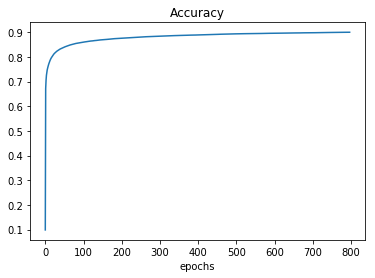

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame(accu)
plt.plot(df)
plt.title("Accuracy")
plt.xlabel("epochs")
plt.show()

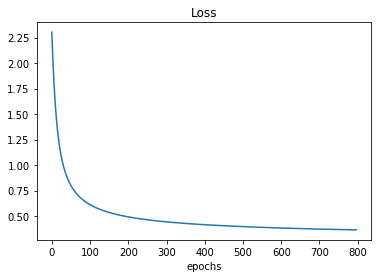

In [185]:
%matplotlib inline
df = pd.DataFrame(trainLosses)
plt.plot(df)
plt.title("Loss")
plt.xlabel("epochs")
plt.show()

In [184]:
'''Evaluating Training Accuracy'''
print("Training Accuracy: ", acc(tr_pred, target))

Training Accuracy:  0.9000833333333333


In [187]:
'''Evaluating Testing Accuracy'''
test_pred_in = net_input(test_data, W)
test_pred = softmax(test_pred_in)
test_pred = to_classlabel(test_pred)
print("Testing Accuracy: ", acc(test_pred, test_target))

Testing Accuracy:  0.9059


In [190]:
'''Confusion Matrix for MNIST Testing Dataset'''
log_conf_mtx_mnist_test = np.zeros((10, 10))
for i in range(test_pred.shape[0]):
    a = test_target[i]
    c = (test_pred[i])
    log_conf_mtx_mnist_test[a][c] += 1.0 

print("Confusion Matrix for MNIST Training Dataset: \n\n", np.matrix(log_conf_mtx_mnist_test))

Confusion Matrix for MNIST Training Dataset: 

 [[ 957.    0.    3.    2.    0.    3.   10.    1.    4.    0.]
 [   0. 1103.    2.    4.    1.    2.    4.    1.   18.    0.]
 [  11.    6.  896.   16.   15.    0.   15.   20.   45.    8.]
 [   5.    0.   18.  904.    1.   32.    3.   15.   21.   11.]
 [   1.    4.    5.    1.  907.    0.   11.    1.    8.   44.]
 [  14.    5.    4.   41.   13.  740.   16.   10.   41.    8.]
 [  16.    3.    5.    2.   13.   16.  898.    1.    4.    0.]
 [   3.   19.   28.    4.   11.    0.    0.  923.    3.   37.]
 [   9.    9.    9.   27.    8.   27.   13.   15.  843.   14.]
 [  10.    7.    5.   10.   43.   13.    0.   25.    8.  888.]]


In [188]:
'''Evaluating Testing Accuracy of USPS Dataset'''
USPSMatt = np.array(USPSMat)
usps_test_pred_in = net_input(USPSMatt, W)
usps_test_pred = softmax(usps_test_pred_in)
usps_test_pred = to_classlabel(usps_test_pred)
print("Testing Accuracy: ", acc(usps_test_pred, USPSTar))

Testing Accuracy:  0.3546177308865443


In [189]:
'''Confusion Matrix for USPS Testing Dataset'''
log_conf_mtx_usps_test = np.zeros((10, 10))
for i in range(usps_test_pred.shape[0]):
    a = USPSTar[i]
    c = (usps_test_pred[i])
    log_conf_mtx_usps_test[a][c] += 1.0 

print("Confusion Matrix for USPS Training Dataset: \n\n", np.matrix(log_conf_mtx_usps_test))

Confusion Matrix for USPS Training Dataset: 

 [[ 596.    4.  346.   59.  248.  136.   93.   43.  163.  312.]
 [ 222.  307.  136.  347.  278.   58.   40.  321.  273.   18.]
 [ 206.   25. 1183.  146.   63.   84.   94.   87.   88.   23.]
 [ 101.    3.  119. 1296.   18.  244.   25.   62.   87.   45.]
 [  56.   77.   39.   62. 1017.  121.   42.  133.  295.  158.]
 [ 169.   20.  212.  176.   42. 1083.  116.   68.   84.   30.]
 [ 352.   13.  357.  107.  100.  256.  690.   23.   67.   35.]
 [ 195.  210.  311.  453.   74.   85.   32.  308.  282.   50.]
 [ 220.   30.  149.  209.  125.  592.  109.   47.  438.   81.]
 [  40.  178.  160.  477.  147.   89.   12.  384.  339.  174.]]


# Neural Network

In [80]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
num_classes = 10
second_dense_layer_nodes = 256
third_dense_layer_nodes = 128
def get_model():
    image_size = 784 
    model = Sequential()
    model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
    model.add(Dense(second_dense_layer_nodes, activation='relu', input_dim=image_size))    
    model.add(Dense(third_dense_layer_nodes, activation='sigmoid', input_dim=image_size))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.summary()
    sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 67,754
Trainable params: 67,754
Non-trainable params: 0
_________________________________________________________________


In [81]:
'''Training on MNIST'''
from keras.callbacks import EarlyStopping
y_train = keras.utils.to_categorical(target, num_classes)
y_test = keras.utils.to_categorical(test_target, num_classes)
early_patience = 10
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')
history = model.fit(training, y_train, batch_size=256, epochs=500, validation_split=0.16666, callbacks = [earlystopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.0695 - acc: 0.6468 - val_loss: 0.3424 - val_acc: 0.9021
Epoch 2/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.2917 - acc: 0.9150 - val_loss: 0.2235 - val_acc: 0.9341
Epoch 3/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.2078 - acc: 0.9393 - val_loss: 0.1763 - val_acc: 0.9482
Epoch 4/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.1639 - acc: 0.9512 - val_loss: 0.1435 - val_acc: 0.9573
Epoch 5/500
50000/50000 [==============================] - 2s 37us/step - loss: 0.1400 - acc: 0.9578 - val_loss: 0.1460 - val_acc: 0.9581
Epoch 6/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1229 - acc: 0.9630 - val_loss: 0.1361 - val_acc: 0.9598
Epoch 7/500
50000/50000 [==============================] - 2s 35us/step - loss: 0.1109 - acc: 0.9658 - val_loss: 0.1402 - 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D58103E588>,
      dtype=object)

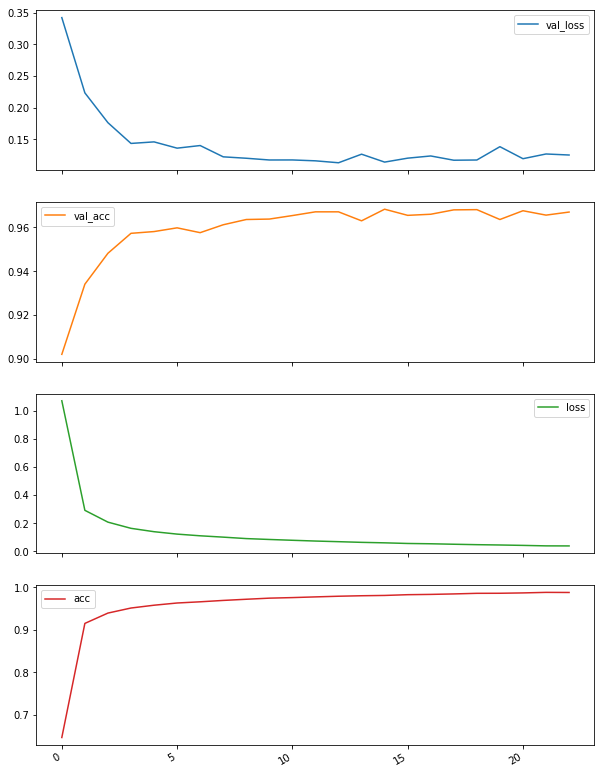

In [82]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=False, figsize=(10,15))


In [94]:
'''Building Confusion Matrix for MNIST Training Dataset'''
pred_mnist_tr = model.predict(training)
conf_mtx_mnist_tr = np.zeros((10, 10))
for i in range(pred_mnist_tr.shape[0]):
    a = target[i]
    c = np.argmax(pred_mnist_tr[i])
    conf_mtx_mnist_tr[a][c] += 1.0 

print("Confusion Matrix for MNIST Training Dataset: \n\n", np.matrix(conf_mtx_mnist_tr))
        


Confusion Matrix for MNIST Training Dataset: 

 [[5824.    0.   14.    5.    2.   23.   24.    4.   20.    7.]
 [   0. 6715.    3.    2.    1.    0.    2.    6.   13.    0.]
 [   2.   32. 5825.   22.    4.    3.    3.   55.    9.    3.]
 [   1.   10.   15. 5969.    2.   87.    0.   14.   20.   13.]
 [   2.   15.    2.    1. 5691.    4.   25.    3.   18.   81.]
 [   4.    1.    6.   11.    3. 5366.   12.    3.   11.    4.]
 [   8.    2.    3.    0.    5.   26. 5870.    0.    3.    1.]
 [   0.   22.    6.    8.    3.    8.    0. 6200.    1.   17.]
 [   3.   32.   13.   15.    3.   28.    7.    3. 5731.   16.]
 [   3.   12.    1.    9.   24.   27.    0.   19.   21. 5833.]]


In [91]:
'''Testing on MNIST'''
loss1, accuracy1 = model.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy on MNIST: ", accuracy1)

Testing Accuracy on MNIST:  0.9651


In [93]:
'''Confusion Matrix for MNIST Testing Dataset:'''
pred_mnist_test = model.predict(test_data)
conf_mtx_mnist_test = np.zeros((10, 10))
for i in range(pred_mnist_test.shape[0]):
    a = test_target[i]
    c = np.argmax(pred_mnist_test[i])
    conf_mtx_mnist_test[a][c] += 1.0 
    
print("Confusion Matrix for MNIST Testing Dataset: \n\n", np.matrix(conf_mtx_mnist_test))

Confusion Matrix for MNIST Testing Dataset: 

 [[ 951.    0.    4.    0.    0.    8.   10.    3.    2.    2.]
 [   0. 1121.    2.    3.    0.    2.    3.    0.    3.    1.]
 [   3.    8.  995.    8.    1.    1.    4.    7.    4.    1.]
 [   1.    1.    5.  967.    0.   22.    0.    6.    6.    2.]
 [   1.    0.    1.    1.  937.    1.    8.    2.    3.   28.]
 [   1.    0.    0.    5.    2.  872.    4.    0.    5.    3.]
 [   4.    3.    1.    0.    7.    8.  932.    0.    3.    0.]
 [   1.   11.    9.    7.    0.    2.    0.  991.    1.    6.]
 [   2.    4.    5.    8.    6.   10.    5.    1.  929.    4.]
 [   2.   10.    0.    3.   10.   15.    0.    8.    5.  956.]]


In [95]:
#Code Segment for majority voting (MNIST _ Hard Voting)
pred_mnist_test_val = np.zeros((len(test_target), 1))
for i in range(len(test_target)):
    k = np.argmax(pred_mnist_test[i])
    pred_mnist_test_val[i][0] = k

In [104]:
'''Testing on USPS Dataset'''
USPSMat = np.array(USPSMat)
y_test_usps = keras.utils.to_categorical(USPSTar, num_classes) 
loss2, accuracy2 = model.evaluate(USPSMat, y_test_usps, verbose=False)
print("Testing Accuracy on USPS: ", accuracy2)

Testing Accuracy on USPS:  0.439821991092104


In [99]:
'''Confusion Matrix for USPS Testing Dataset:'''
pred_usps_test = model.predict(USPSMat)
conf_mtx_usps_test = np.zeros((10, 10))
for i in range(pred_usps_test.shape[0]):
    a = USPSTar[i]
    c = np.argmax(pred_usps_test[i])
    conf_mtx_usps_test[a][c] += 1.0 
print("Confusion Matrix for USPS Testing Dataset: \n\n", np.matrix(conf_mtx_usps_test))  

Confusion Matrix for USPS Testing Dataset: 

 [[ 416.    6.   93.   99.  171.  297.   60.  119.  137.  602.]
 [  14.  555.  280.   61.  236.  188.   42.  442.  101.   81.]
 [  38.   66. 1307.  120.   33.  174.  110.   68.   75.    8.]
 [  18.   21.   54. 1353.   14.  409.    8.   49.   64.   10.]
 [   7.   59.   46.   17.  958.  238.   20.  304.  171.  180.]
 [  39.   34.  112.  197.   27. 1352.   70.   46.  100.   23.]
 [ 128.   18.  297.   49.   70.  256. 1050.    9.   70.   53.]
 [  17.  188.  283.  302.   30.  121.   12.  881.  128.   38.]
 [ 172.   31.  202.  221.   88.  396.  122.  111.  596.   61.]
 [   3.  147.  108.  241.  189.   84.    6.  603.  291.  328.]]


In [103]:
#Code Segment for majority voting (USPS _ Hard Voting)
pred_test_usps_val = np.zeros((len(USPSTar), 1))
for i in range(len(USPSTar)):
    k = np.argmax(pred_usps_test[i])
    pred_test_usps_val[i][0] = k

# SVM

In [57]:
#SVM
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
classifier1 = SVC(kernel='rbf', C=20, gamma=0.05);
classifier1.fit(training, target)


SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
from sklearn.metrics import accuracy_score
predicted = classifier1.predict(test_data)
'''Testing on MNIST'''
print("Testing Accuracy on MNIST",accuracy_score(test_target, predicted))

0.984


In [105]:
'''Confusion Matrix for MNIST Testing Dataset'''
conf_mtx_svm_mnist_test = np.zeros((10, 10))
for i in range(predicted.shape[0]):
    a = test_target[i]
    c = (predicted[i])
    conf_mtx_svm_mnist_test[a][c] += 1.0 
np.set_printoptions(suppress=True)   
print("Confusion Matrix for MNIST Testing Dataset: \n\n",np.matrix((conf_mtx_svm_mnist_test)))

Confusion Matrix for MNIST Testing Dataset: 

 [[ 973.    0.    1.    0.    0.    2.    1.    1.    2.    0.]
 [   0. 1128.    3.    1.    0.    1.    0.    1.    1.    0.]
 [   4.    0. 1015.    0.    1.    0.    0.    6.    6.    0.]
 [   0.    0.    2.  995.    0.    3.    0.    6.    4.    0.]
 [   0.    0.    3.    0.  966.    0.    4.    0.    2.    7.]
 [   2.    0.    0.    5.    1.  878.    2.    1.    2.    1.]
 [   4.    2.    0.    0.    2.    3.  946.    0.    1.    0.]
 [   0.    3.    9.    1.    1.    0.    0. 1005.    2.    7.]
 [   1.    0.    1.    3.    1.    2.    0.    2.  961.    3.]
 [   3.    3.    2.    6.    9.    2.    0.    5.    6.  973.]]


In [59]:
'''Testing on USPS'''
predicted_usps = classifier1.predict(USPSMat)
print("Testing Accuracy on USPS: ",accuracy_score(USPSTar, predicted_usps))

0.2738136906845342


In [106]:
'''Confusion Matrix for USPS Testing Dataset'''
conf_mtx_svm_usps_test = np.zeros((10, 10))
for i in range(predicted_usps.shape[0]):
    a = USPSTar[i]
    c = (predicted_usps[i])
    conf_mtx_svm_usps_test[a][c] += 1.0 
    
print("Confusion Matrix for USPS Testing Dataset: \n\n",np.matrix(conf_mtx_svm_usps_test))

Confusion Matrix for USPS Testing Dataset: 

 [[ 238.    0. 1532.    4.   25.   43.    2.    0.   85.   71.]
 [  71.  263.  701.  155.  284.   93.   13.  332.   83.    5.]
 [   8.    0. 1937.    6.    3.   24.    1.    6.   14.    0.]
 [   4.    0. 1139.  737.    0.   67.    0.    0.   53.    0.]
 [   4.    0.  966.   15.  549.  128.    0.   58.  274.    6.]
 [  14.    0. 1198.    9.    1.  744.    0.    0.   34.    0.]
 [  73.    0. 1489.    2.   11.   91.  300.    0.   31.    3.]
 [  15.    6. 1416.  124.    6.  145.    0.  230.   57.    1.]
 [   5.    0. 1275.   13.    3.  286.    0.    0.  418.    0.]
 [   1.    0. 1469.   71.   28.   35.    0.   42.  294.   60.]]


# Random Forest


In [123]:
#RandomForest
classifier2 = RandomForestClassifier(n_estimators=100);
classifier2.fit(tr_data, tr_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
predicted2 = classifier2.predict(test_data)

'''Testing on MNIST'''
print("Testing Accuracy on MNIST: ",accuracy_score(test_target, predicted2))

Testing Accuracy on MNIST:  0.9682


In [125]:
'''Confusion Matrix for MNIST Testing Dataset'''
conf_mtx_rf_mnist_test = np.zeros((10, 10))
for i in range(predicted2.shape[0]):
    a = test_target[i]
    c = (predicted2[i])
    conf_mtx_rf_mnist_test[a][c] += 1.0 
    
print("Confusion Matrix for MNIST Testing Dataset: \n\n",np.matrix(conf_mtx_rf_mnist_test))

Confusion Matrix for MNIST Testing Dataset: 

 [[ 971.    0.    0.    0.    0.    2.    2.    1.    3.    1.]
 [   0. 1122.    3.    3.    0.    2.    2.    0.    2.    1.]
 [   7.    0.  999.    5.    3.    0.    4.    9.    5.    0.]
 [   1.    0.   11.  971.    0.    8.    0.    8.    7.    4.]
 [   1.    0.    0.    0.  954.    0.    5.    0.    3.   19.]
 [   2.    1.    1.   15.    2.  855.    7.    2.    5.    2.]
 [   8.    3.    0.    0.    4.    2.  937.    0.    4.    0.]
 [   0.    4.   17.    3.    1.    0.    0.  987.    4.   12.]
 [   4.    0.    5.   10.    7.    5.    4.    3.  927.    9.]
 [   7.    5.    2.    8.   12.    4.    1.    5.    6.  959.]]


In [126]:
'''Testing on USPS'''
predicted2_usps = classifier2.predict(USPSMat)
print("Testing Accuracy on USPS Dataset: ",accuracy_score(USPSTar, predicted2_usps))

Testing Accuracy on USPS Dataset:  0.3929696484824241


In [127]:
'''Confusion Matrix for USPS Testing Dataset'''
conf_mtx_rf_usps_test = np.zeros((10, 10))
for i in range(predicted2_usps.shape[0]):
    a = USPSTar[i]
    c = (predicted2_usps[i])
    conf_mtx_rf_usps_test[a][c] += 1.0 
    
print("Confusion Matrix for USPS Testing Dataset: \n\n",np.matrix(conf_mtx_rf_usps_test))

Confusion Matrix for USPS Testing Dataset: 

 [[ 676.   12.  272.   54.  421.  163.   43.  103.    7.  249.]
 [  39.  584.  107.  109.   64.  103.   32.  945.   16.    1.]
 [ 120.   33. 1245.   71.   52.  182.   18.  269.    6.    3.]
 [  38.    7.  103. 1270.   50.  350.    2.  166.    7.    7.]
 [  18.  189.   62.   25. 1053.  196.   13.  379.   39.   26.]
 [ 163.   31.  148.  124.   24. 1353.   34.  110.    7.    6.]
 [ 349.   45.  246.   38.   93.  321.  758.  135.    7.    8.]
 [  54.  341.  374.  239.   28.  249.   34.  670.    2.    9.]
 [  74.   49.  165.  210.  101. 1048.   68.  105.  156.   24.]
 [  24.  270.  240.  312.  243.  149.   10.  569.   89.   94.]]


# Ensemble Techniques

In [137]:
'''Simple Majority Voting'''
from scipy.stats import mode

#Evaluating on MNIST Dataset
final_pred_mnist = []
for i in range(0,len(pred_mnist_test_val)):
    final_pred_mnist = np.append(final_pred_mnist, mode([pred_mnist_test_val[i], predicted[i], predicted2[i]])[0])

In [138]:
def accuracy(final_pred, test_target):
    counter = 0
    for i in range(len(test_target)):
        if(final_pred[i] == test_target[i]):
            counter += 1
    return (counter*100)/float(len(test_target))

acc = accuracy(final_pred_mnist, test_target)
print("Accuracy by performing Ensembling (MNIST) of NN, SVM & Random Forest: ",acc)

Accuracy by performing Ensembling of NN, SVM & Random Forest:  98.07


In [151]:
'''Confusion Matrix for Ensembled Classfier (MNIST)'''
conf_mtx_en_mnist_test = np.zeros((10, 10))
for i in range(final_pred_mnist.shape[0]):
    a = test_target[i]
    c = int(final_pred_mnist[i])
    conf_mtx_en_mnist_test[a][c] += 1.0 
    
print("Confusion Matrix for Ensembled (MNIST) Testing Dataset: \n\n",np.matrix(conf_mtx_en_mnist_test))

Confusion Matrix for Ensembled (MNIST) Testing Dataset: 

 [[ 973.    0.    1.    0.    0.    1.    1.    1.    3.    0.]
 [   0. 1126.    2.    2.    0.    2.    1.    0.    2.    0.]
 [   6.    0. 1013.    1.    1.    0.    0.    7.    4.    0.]
 [   0.    0.    4.  992.    0.    5.    0.    6.    3.    0.]
 [   2.    0.    0.    0.  961.    0.    5.    0.    2.   12.]
 [   2.    0.    0.    5.    2.  877.    2.    1.    2.    1.]
 [   4.    3.    0.    0.    2.    3.  945.    0.    1.    0.]
 [   0.    9.   11.    2.    0.    0.    0.  998.    2.    6.]
 [   3.    0.    2.    5.    5.    2.    0.    2.  952.    3.]
 [   4.    7.    2.    6.    9.    3.    0.    5.    3.  970.]]


In [148]:
final_pred_usps = []
for i in range(0,len(pred_test_usps_val)):
    final_pred_usps = np.append(final_pred_usps, mode([pred_test_usps_val[i], predicted_usps[i], predicted2_usps[i]])[0])

In [150]:
acc2 = accuracy(final_pred_usps, USPSTar)
print("Accuracy by performing Ensembling (USPS) of NN, SVM & Random Forest: ",acc2)

Accuracy by performing Ensembling (USPS) of NN, SVM & Random Forest:  39.391969598479925


In [149]:
'''Confusion Matrix for Ensembled Classfier (USPS)'''
conf_mtx_en_usps_test = np.zeros((10, 10))
for i in range(final_pred_usps.shape[0]):
    a = USPSTar[i]
    c = int(final_pred_usps[i])
    conf_mtx_en_usps_test[a][c] += 1.0 
    
print("Confusion Matrix for Ensembled (USPS) Testing Dataset: \n\n",np.matrix(conf_mtx_en_usps_test))

Confusion Matrix for Ensembled (USPS) Testing Dataset: 

 [[ 713.   14.  747.   21.  146.  103.   11.   21.    9.  215.]
 [  71.  581.  411.  122.  119.  109.   16.  528.   39.    4.]
 [  79.   45. 1705.   31.   14.   78.    5.   35.    7.    0.]
 [  43.   21.  519. 1189.    3.  188.    1.   16.   19.    1.]
 [  18.  167.  384.   13.  938.  178.    3.  192.   92.   15.]
 [ 136.   41.  531.   57.    6. 1188.   10.   15.   15.    1.]
 [ 357.   30.  814.    5.   32.  123.  617.    5.   13.    4.]
 [  59.  316.  766.  173.   11.  138.    3.  524.    9.    1.]
 [ 160.   51.  805.  106.   29.  453.   22.   41.  330.    3.]
 [  25.  280.  792.  131.  128.   59.    1.  337.  154.   93.]]


In [191]:
'''Ensemble of Logistic Regression, NN, SVM and Random Forest'''
final_pred_mnist2 = []
for i in range(0,len(pred_mnist_test_val)):
    final_pred_mnist2 = np.append(final_pred_mnist2, mode([test_pred[i],pred_mnist_test_val[i], predicted[i], predicted2[i]])[0])

In [192]:
acc3 = accuracy(final_pred_mnist2, test_target)
print("Accuracy by performing Ensembling (MNIST) of Logistic Regression, NN, SVM & Random Forest: ",acc3)

Accuracy by performing Ensembling (MNIST) of Logistic Regression, NN, SVM & Random Forest:  97.4


In [193]:
'''Confusion Matrix for Ensembled Classfier (MNIST)'''
conf_mtx_en_mnist_test1 = np.zeros((10, 10))
for i in range(final_pred_mnist2.shape[0]):
    a = test_target[i]
    c = int(final_pred_mnist2[i])
    conf_mtx_en_mnist_test1[a][c] += 1.0 
    
print("Confusion Matrix for Ensembled (MNIST) Testing Dataset: \n\n",np.matrix(conf_mtx_en_mnist_test1))

Confusion Matrix for Ensembled (MNIST) Testing Dataset: 

 [[ 972.    0.    1.    0.    0.    1.    2.    1.    3.    0.]
 [   0. 1126.    2.    2.    0.    2.    1.    0.    2.    0.]
 [   6.    2. 1010.    2.    1.    0.    0.    7.    4.    0.]
 [   1.    0.   10.  984.    0.    5.    0.    6.    4.    0.]
 [   1.    0.    2.    0.  963.    0.    4.    0.    2.   10.]
 [   2.    1.    0.    9.    2.  871.    3.    1.    2.    1.]
 [   5.    3.    0.    0.    4.    4.  942.    0.    0.    0.]
 [   1.    9.   18.    1.    1.    0.    0.  991.    1.    6.]
 [   4.    2.    4.    8.    8.    8.    5.    3.  929.    3.]
 [   9.    6.    1.    9.   13.    6.    0.    9.    4.  952.]]


In [194]:
final_pred_usps2 = []
for i in range(0,len(pred_test_usps_val)):
    final_pred_usps2 = np.append(final_pred_usps2, mode([usps_test_pred[i], pred_test_usps_val[i], predicted_usps[i], predicted2_usps[i]])[0])

In [195]:
acc4 = accuracy(final_pred_usps2, USPSTar)
print("Accuracy by performing Ensembling (USPS) of Logistic Regression, NN, SVM & Random Forest: ",acc4)

Accuracy by performing Ensembling (USPS) of Logistic Regression, NN, SVM & Random Forest:  40.42702135106755


In [196]:
'''Confusion Matrix for Ensembled Classfier (USPS)'''
conf_mtx_en_usps_test1 = np.zeros((10, 10))
for i in range(final_pred_usps2.shape[0]):
    a = USPSTar[i]
    c = int(final_pred_usps2[i])
    conf_mtx_en_usps_test1[a][c] += 1.0 
    
print("Confusion Matrix for Ensembled (USPS) Testing Dataset: \n\n",np.matrix(conf_mtx_en_usps_test1))

Confusion Matrix for Ensembled (USPS) Testing Dataset: 

 [[ 666.    8.  569.   34.  218.  127.   36.   27.   40.  275.]
 [ 131.  533.  310.  154.  204.  106.   21.  481.   54.    6.]
 [ 119.   31. 1589.   53.   27.   87.   19.   60.   14.    0.]
 [  71.   13.  272. 1340.   10.  222.    2.   37.   27.    6.]
 [  31.  125.  169.   19. 1046.  190.   13.  190.  167.   50.]
 [ 123.   26.  359.  119.   15. 1254.   32.   42.   26.    4.]
 [ 347.   13.  650.   18.   55.  191.  663.   18.   25.   20.]
 [ 110.  269.  636.  244.   23.  137.    8.  492.   67.   14.]
 [ 169.   40.  424.  164.   59.  649.   50.   53.  371.   21.]
 [  28.  219.  441.  310.  138.   82.    3.  420.  228.  131.]]
